

Posiciones encontradas:
- Posición #0: x = 8.918, y = -6.04, z = -8.36
- Posición #1: x = 1.956, y = -1.349, z = 2.139
- Posición #2: x = 4.235, y = -0.506, z = -4.31
- Posición #3: x = 5.852, y = 3.486, z = 9.417
- Posición #4: x = -7.944, y = -2.05, z = 8.719
- Posición #5: x = -0.668, y = -7.038, z = 4.637
- Posición #6: x = 7.717, y = 7.804, z = -6.901
- Posición #7: x = 0.114, y = 0.852, z = -0.155
- Posición #8: x = 6.85, y = 0.094, z = -2.878
- Posición #9: x = -6.089, y = -2.262, z = -1.491
- Posición #10: x = 6.558, y = -1.157, z = 6.519
- Posición #11: x = -4.654, y = 9.747, z = -7.883
- Posición #12: x = -7.491, y = -0.734, z = -9.879
- Posición #13: x = -4.071, y = -7.332, z = -1.724
- Posición #14: x = -7.483, y = -8.836, z = 1.67
- Posición #15: x = 3.259, y = -0.815, z = -3.848
- Posición #16: x = 0.628, y = -1.334, z = -7.366
- Posición #17: x = 5.965, y = 7.225, z = -5.326
- Posición #18: x = 0.445, y = 7.408, z = 0.196
- Posición #19: x = -2.947, y = -5.237, z = -5.

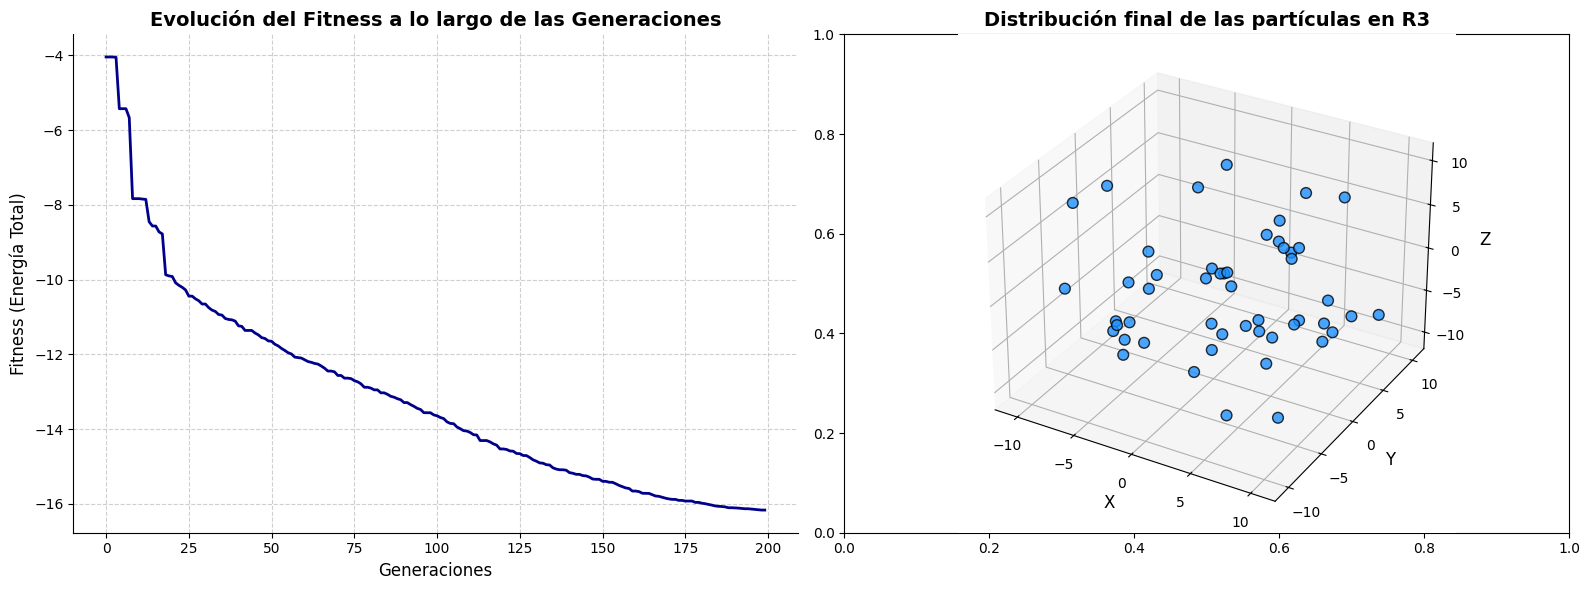

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
import random as rd

class ParticleSystem:
    Unique_ids = 0

    def __init__(self, positions=None, size=50):
        self.Id = ParticleSystem.Unique_ids
        ParticleSystem.Unique_ids += 1

        if positions is None:
            self.positions = [np.random.uniform(-10, 10, 3) for _ in range(size)]
        else:
            self.positions = positions

        self.fitness = -self.TotalEnergy()
        
    def LennardJones(self, r):
        return 4 * ((1 / r)**12 - (1 / r)**6)

    def TotalEnergy(self):
        N = len(self.positions)
        energy = 0
        for i in range(N):
            for j in range(i + 1, N):
                r = np.linalg.norm(self.positions[i] - self.positions[j])
                if r != 0:
                    energy += self.LennardJones(r)
        
        return energy

    def mutation(self, mutation_rate=0.05, mutation_scale=0.01):
        for i in range(len(self.positions)):
            if rd.random() < mutation_rate:
                self.positions[i] += np.random.normal(0, mutation_scale, 3)

        self.fitness = -self.TotalEnergy()

    def __repr__(self):
        return f"Partícula #{self.Id} | Fitness: {self.fitness:.2f}"

def selection_pair(population):
    selected = []
    for _ in range(2):
        contenders = rd.sample(population, 2)
        contender = max(contenders, key=lambda particle: particle.fitness)
        selected.append(contender)

    return selected

def crossover(parent1, parent2):
    p = rd.randint(1, len(parent1.positions) - 1)
    child1_position = np.concatenate((parent1.positions[:p], parent2.positions[p:]))
    child2_position = np.concatenate((parent2.positions[:p], parent1.positions[p:]))
    child1 = ParticleSystem(positions=child1_position)
    child2 = ParticleSystem(positions=child2_position)
    return child1, child2

def generate_population(size):
    return [ParticleSystem() for _ in range(size)]

def evolve(epochs, population_size=100):
    systems = generate_population(population_size)
    fitness_history = []

    for i in range(1, epochs + 1):
        #print(f"Época #{i}...")
        systems.sort(key=lambda particle: particle.fitness, reverse=True)
        fitness_history.append(-systems[0].fitness)

        next_generation = systems[:2]

        while len(next_generation) < population_size:
            parents = selection_pair(systems)
            child1, child2 = crossover(parents[0], parents[1])
            child1.mutation()
            child2.mutation()
            next_generation += [child1, child2]

        systems = next_generation[:population_size]

    return systems[0].positions, fitness_history, systems[0].fitness

positions, fitness_history, total_energy = evolve(200)
positions = np.array(positions)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(wspace=0.3)

ax1.plot(fitness_history, color='darkblue', linewidth=2)
ax1.set_xlabel('Generaciones', fontsize=12)
ax1.set_ylabel('Fitness (Energía Total)', fontsize=12)
ax1.set_title('Evolución del Fitness a lo largo de las Generaciones', fontsize=14, fontweight='bold')
ax1.grid(True, linestyle='--', alpha=0.6)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(positions[:, 0], positions[:, 1], positions[:, 2], c='dodgerblue', marker='o', s=60, alpha=0.8, edgecolor='k')
ax2.set_xlabel('X', fontsize=12)
ax2.set_ylabel('Y', fontsize=12)
ax2.set_zlabel('Z', fontsize=12)
ax2.set_title('Distribución final de las partículas en R3', fontsize=14, fontweight='bold')
ax2.set_xlim(-12, 12)
ax2.set_ylim(-12, 12)
ax2.set_zlim(-12, 12)
ax2.grid(True, linestyle='--', alpha=0.4)

def update(angle):
    ax2.view_init(30, angle)

ani = FuncAnimation(fig, update, frames=np.arange(0, 360, 2), interval=50)

print("\n")
print("Posiciones encontradas:")
for pos in range(len(positions)):
    print(f"- Posición #{pos}: x = {round(positions[pos][0],3)}, y = {round(positions[pos][1],3)}, z = {round(positions[pos][2],3)}")

print(f"\nEnergía Total: {-total_energy}")

plt.tight_layout()
plt.show()